# Sparse Gaussian Process 

In [1]:
import matplotlib as mpl; mpl.use('pgf')

In [2]:
%matplotlib inline

In [3]:
import numpy as np

# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()

import tensorflow as tf
import tensorflow_probability as tfp

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from collections import defaultdict

from matplotlib import animation
from IPython.display import HTML
from etudes.gaussian_processes import gp_sample_custom, dataframe_from_gp_samples

In [4]:
golden_ratio = 0.5 * (1 + np.sqrt(5))
golden_size = lambda width: (width, width / golden_ratio)

In [5]:
width = 10

rc = {
    "figure.figsize": golden_size(width),
    "text.usetex": True,
}

sns.set(context="notebook", style="ticks", palette="colorblind", font="serif", rc=rc)

In [10]:
# shortcuts
tfd = tfp.distributions
kernels = tfp.math.psd_kernels

# constants
n_train = 500
observation_noise_variance = 1e-1

n_features = 1 # dimensionality
n_index_points = 256 # nbr of index points

n_samples = 8 # nbr of GP prior samples
jitter = 1e-2
kernel_cls = kernels.ExponentiatedQuadratic

n_inducing_points = 20
n_epochs = 2000
batch_size = 50

seed = 42 # set random seed for reproducibility
random_state = np.random.RandomState(seed)

x_min, x_max = -1.0, 1.0
y_min, y_max = -3.0, 3.0
x_loc = -0.5
# index points
X_q = tf.linspace(x_min, x_max, n_index_points).numpy().reshape(-1, n_features)

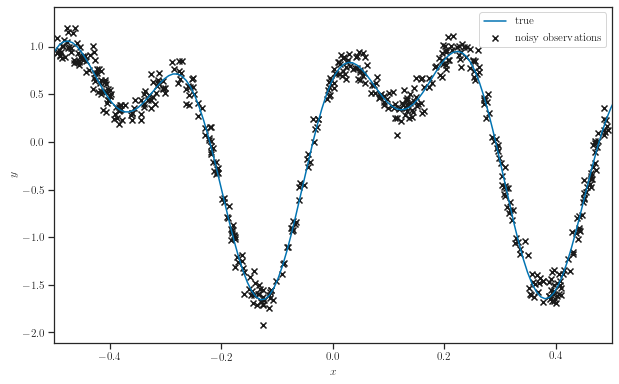

In [11]:
f = lambda x: tf.sin(12.0*x) + 0.66*tf.cos(25.0*x)

X = x_loc + random_state.rand(n_train, n_features) 
eps = observation_noise_variance * random_state.randn(n_train, n_features)
Y = tf.squeeze(f(X) + eps)

fig, ax = plt.subplots()

ax.plot(X_q, f(X_q), label="true")
ax.scatter(X, Y, marker='x', color='k', label="noisy observations")

ax.legend()

ax.set_xlim(x_loc, -x_loc)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

plt.show()

In [12]:
# amplitude = tf.exp(tf.Variable(np.float64(0)), name='amplitude')
# length_scale = tf.exp(tf.Variable(np.float64(-1)), name='length_scale')
# observation_noise_variance = tf.exp(tf.Variable(np.float64(-5)), name='observation_noise_variance')
# kernel = kernel_cls(amplitude=amplitude, length_scale=length_scale)
# gp = tfd.GaussianProcess(
#     kernel=kernel,
#     index_points=X,
#     observation_noise_variance=observation_noise_variance
# )

In [13]:
# nll = - gp.log_prob(Y)
# nll

In [14]:
# optimizer = tf.train.AdamOptimizer(learning_rate=.05, beta1=.5, beta2=.99)
# optimize = optimizer.minimize(nll)

In [15]:
# history = defaultdict(list)

# with tf.Session() as sess:

#     sess.run(tf.global_variables_initializer())

#     for i in range(500):
#         (_, nll_value, amplitude_value, length_scale_value, 
#          observation_noise_variance_value) = sess.run([optimize, nll, amplitude, length_scale, observation_noise_variance])
#         history["nll"].append(nll_value)
#         history["amplitude"].append(amplitude_value)
#         history["length_scale"].append(length_scale_value)
#         history["observation_noise_variance"].append(observation_noise_variance_value)

In [16]:
# fig, ax = plt.subplots()

# sns.lineplot(x='amplitude', y='length_scale', 
#              sort=False, data=pd.DataFrame(history), alpha=0.8, ax=ax)

# ax.set_xlabel(r"amplitude $\sigma$")
# ax.set_ylabel(r"lengthscale $\ell$")

# plt.show()

In [17]:
# kernel_history = kernel_cls(amplitude=history.get("amplitude"), length_scale=history.get("length_scale"))
# gprm_history = tfd.GaussianProcessRegressionModel(
#     kernel=kernel_history, index_points=X_q, observation_index_points=X, observations=Y,
#     observation_noise_variance=history.get("observation_noise_variance"), jitter=jitter
# )
# gprm_mean = gprm_history.mean()
# gprm_stddev = gprm_history.stddev()

In [18]:
# with tf.Session() as sess:
#     gprm_mean_value, gprm_stddev_value = sess.run([gprm_mean, gprm_stddev])

In [19]:
# fig, ax = plt.subplots()

# ax.plot(X_q, gprm_mean_value[0])
# ax.fill_between(np.squeeze(X_q), 
#                 gprm_mean_value[0] - 2*gprm_stddev_value[0], 
#                 gprm_mean_value[0] + 2*gprm_stddev_value[0], alpha=0.1)

# ax.scatter(X, Y, marker='x', color='k', label="noisy observations")

# ax.set_xlabel('$x$')
# ax.set_ylabel('$y$')
# ax.set_ylim(y_min, y_max)

# plt.show()

In [20]:
# fig, ax = plt.subplots()

# ax.plot(X_q, gprm_mean_value[-1])
# ax.fill_between(np.squeeze(X_q), 
#                 gprm_mean_value[-1] - 2*gprm_stddev_value[-1], 
#                 gprm_mean_value[-1] + 2*gprm_stddev_value[-1], alpha=0.1)

# ax.scatter(X, Y, marker='x', color='k', label="noisy observations")

# ax.set_xlabel('$x$')
# ax.set_ylabel('$y$')
# ax.set_ylim(y_min, y_max)

# plt.show()

In [44]:
amplitude = tf.exp(tf.Variable(np.float64(0)), name='amplitude')
length_scale = tf.exp(tf.Variable(np.float64(-1)), name='length_scale')
observation_noise_variance = tf.exp(tf.Variable(np.float64(-5)), name='observation_noise_variance')
kernel = kernel_cls(amplitude=amplitude, length_scale=length_scale)

In [45]:
# bijector = tfp.bijectors.Chain([tfp.bijectors.CholeskyOuterProduct(), 
#                                 ])
# bijector

In [46]:
n_inducing_points = 20

In [47]:
inducing_index_points = tf.Variable(inducing_index_points_initial, 
                                    name='inducing_index_points')

# variational_inducing_observations_loc = tf.Variable(np.zeros(n_inducing_points), 
#                                                     name='variational_inducing_observations_loc')
# variational_inducing_observations_scale = tf.Variable(
#     np.eye(n_inducing_points), name='variational_inducing_observations_scale')

# variational_inducing_observations_scale = tfp.util.TransformedVariable(
#     np.eye(n_inducing_points), tfp.bijectors.FillTriangular(), name='variational_inducing_observations_scale'
# )

# variational_inducing_observations_scale_flat = tf.Variable(
#     random_state.rand(n_inducing_points * (n_inducing_points + 1) // 2),
#     name='variational_inducing_observations_scale_flat')
# variational_inducing_observations_scale = tfp.math.fill_triangular(variational_inducing_observations_scale_flat)

In [21]:
class RBFKernelFn(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(RBFKernelFn, self).__init__(**kwargs)
        dtype = kwargs.get('dtype', None)

        self.ln_amplitude = self.add_variable(
            initializer=tf.constant_initializer(0),
            dtype=dtype, name='amplitude')
    
        self.ln_length_scale = self.add_variable(
            initializer=tf.constant_initializer(0),
            dtype=dtype, name='length_scale')

    def call(self, x):
        # Never called -- this is just a layer so it can hold variables
        # in a way Keras understands.
        return x

    @property
    def kernel(self):
        return tfp.math.psd_kernels.ExponentiatedQuadratic(
            amplitude=tf.exp(self.ln_amplitude),
            length_scale=tf.exp(self.ln_length_scale)
        )

In [30]:
inducing_index_points_initial = random_state.choice(X.squeeze(), n_inducing_points).reshape(-1, n_features)
inducing_index_points_initial.shape

(20, 1)

In [32]:
tf.keras.backend.set_floatx('float64')

# Build model.
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=[1]),
#     tf.keras.layers.Dense(1, kernel_initializer='ones', use_bias=False),
    tfp.layers.VariationalGaussianProcess(
        num_inducing_points=n_inducing_points,
        kernel_provider=RBFKernelFn(),
        event_shape=[1],
        inducing_index_points_initializer=tf.constant_initializer(inducing_index_points_initial),
        unconstrained_observation_noise_variance_initializer=(
            tf.constant_initializer(np.float64(-5))),
    ),
])

# Do inference.
batch_size = 32
loss = lambda y, rv_y: rv_y.variational_loss(
    y, kl_weight=batch_size/n_train)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss=loss)
model.fit(X, Y, batch_size=batch_size, epochs=1000)

/usr/local/lib/python3.6/dist-packages/tensorflow_probability/python/distributions/gaussian_process.py:305: UserWarning: Unable to detect statically whether the number of index_points is 1. As a result, defaulting to treating the marginal GP at `index_points` as a multivariate Gaussian. This makes some methods, like `cdf` unavailable.
  'Unable to detect statically whether the number of index_points is '


Train on 500 samples
Epoch 1/1000


/usr/local/lib/python3.6/dist-packages/tensorflow_probability/python/distributions/gaussian_process.py:305: UserWarning: Unable to detect statically whether the number of index_points is 1. As a result, defaulting to treating the marginal GP at `index_points` as a multivariate Gaussian. This makes some methods, like `cdf` unavailable.
  'Unable to detect statically whether the number of index_points is '


500/500 [==============================] - 3s 7ms/sample - loss: 1804.7060
Epoch 2/1000
500/500 [==============================] - 0s 178us/sample - loss: 1269.0125
Epoch 3/1000
500/500 [==============================] - 0s 180us/sample - loss: 1158.2454
Epoch 4/1000
500/500 [==============================] - 0s 179us/sample - loss: 1223.4801
Epoch 5/1000
500/500 [==============================] - 0s 178us/sample - loss: 1212.6837
Epoch 6/1000
500/500 [==============================] - 0s 177us/sample - loss: 1032.9625
Epoch 7/1000
500/500 [==============================] - 0s 183us/sample - loss: 992.0327
Epoch 8/1000
500/500 [==============================] - 0s 171us/sample - loss: 978.1951
Epoch 9/1000
500/500 [==============================] - 0s 184us/sample - loss: 829.4755
Epoch 10/1000
500/500 [==============================] - 0s 177us/sample - loss: 674.6404
Epoch 11/1000
500/500 [==============================] - 0s 179us/sample - loss: 572.8759
Epoch 12/1000
500/500 [=====

500/500 [==============================] - 0s 175us/sample - loss: 40.7416
Epoch 92/1000
500/500 [==============================] - 0s 177us/sample - loss: 14.8154
Epoch 93/1000
500/500 [==============================] - 0s 176us/sample - loss: 5.7073
Epoch 94/1000
500/500 [==============================] - 0s 176us/sample - loss: 13.3636
Epoch 95/1000
500/500 [==============================] - 0s 169us/sample - loss: 35.6218
Epoch 96/1000
500/500 [==============================] - 0s 167us/sample - loss: 11.7261
Epoch 97/1000
500/500 [==============================] - 0s 164us/sample - loss: 20.8136
Epoch 98/1000
500/500 [==============================] - 0s 201us/sample - loss: 83.6378
Epoch 99/1000
500/500 [==============================] - 0s 172us/sample - loss: 35.9083
Epoch 100/1000
500/500 [==============================] - 0s 167us/sample - loss: 32.7753
Epoch 101/1000
500/500 [==============================] - 0s 177us/sample - loss: 111.2367
Epoch 102/1000
500/500 [=========

500/500 [==============================] - 0s 155us/sample - loss: 0.4923
Epoch 274/1000
500/500 [==============================] - 0s 152us/sample - loss: -1.7396
Epoch 275/1000
500/500 [==============================] - 0s 158us/sample - loss: 2.6236
Epoch 276/1000
500/500 [==============================] - 0s 156us/sample - loss: 0.3036
Epoch 277/1000
500/500 [==============================] - 0s 157us/sample - loss: 1.6478
Epoch 278/1000
500/500 [==============================] - 0s 154us/sample - loss: 3.0039
Epoch 279/1000
500/500 [==============================] - 0s 154us/sample - loss: 3.7143
Epoch 280/1000
500/500 [==============================] - 0s 159us/sample - loss: 0.8200
Epoch 281/1000
500/500 [==============================] - 0s 152us/sample - loss: 1.3079
Epoch 282/1000
500/500 [==============================] - 0s 155us/sample - loss: 1.2555
Epoch 283/1000
500/500 [==============================] - 0s 156us/sample - loss: 1.4764
Epoch 284/1000
500/500 [===========

500/500 [==============================] - 0s 155us/sample - loss: 1832.3138
Epoch 456/1000
500/500 [==============================] - 0s 153us/sample - loss: 1785.3539
Epoch 457/1000
500/500 [==============================] - 0s 154us/sample - loss: 1753.4408
Epoch 458/1000
500/500 [==============================] - 0s 156us/sample - loss: 1723.2126
Epoch 459/1000
500/500 [==============================] - 0s 154us/sample - loss: 1686.1961
Epoch 460/1000
500/500 [==============================] - 0s 154us/sample - loss: 1668.8842
Epoch 461/1000
500/500 [==============================] - 0s 153us/sample - loss: 1650.1345
Epoch 462/1000
500/500 [==============================] - 0s 156us/sample - loss: 1631.9681
Epoch 463/1000
500/500 [==============================] - 0s 154us/sample - loss: 1595.3248
Epoch 464/1000
500/500 [==============================] - 0s 156us/sample - loss: 1577.4251
Epoch 465/1000
500/500 [==============================] - 0s 155us/sample - loss: 1555.4556
Epo

500/500 [==============================] - 0s 157us/sample - loss: 222.3325
Epoch 635/1000
500/500 [==============================] - 0s 161us/sample - loss: 218.3593
Epoch 636/1000
500/500 [==============================] - 0s 168us/sample - loss: 217.3870
Epoch 637/1000
500/500 [==============================] - 0s 168us/sample - loss: 214.9832
Epoch 638/1000
500/500 [==============================] - 0s 163us/sample - loss: 212.6694
Epoch 639/1000
500/500 [==============================] - 0s 170us/sample - loss: 210.1025
Epoch 640/1000
500/500 [==============================] - 0s 170us/sample - loss: 207.5552
Epoch 641/1000
500/500 [==============================] - 0s 174us/sample - loss: 206.2649
Epoch 642/1000
500/500 [==============================] - 0s 165us/sample - loss: 201.6006
Epoch 643/1000
500/500 [==============================] - 0s 171us/sample - loss: 201.3078
Epoch 644/1000
500/500 [==============================] - 0s 174us/sample - loss: 198.9927
Epoch 645/1000

500/500 [==============================] - 0s 185us/sample - loss: 31.4465
Epoch 816/1000
500/500 [==============================] - 0s 177us/sample - loss: 31.9249
Epoch 817/1000
500/500 [==============================] - 0s 177us/sample - loss: 31.2420
Epoch 818/1000
500/500 [==============================] - 0s 155us/sample - loss: 31.3233
Epoch 819/1000
500/500 [==============================] - 0s 160us/sample - loss: 31.1786
Epoch 820/1000
500/500 [==============================] - 0s 165us/sample - loss: 30.5746
Epoch 821/1000
500/500 [==============================] - 0s 169us/sample - loss: 30.4121
Epoch 822/1000
500/500 [==============================] - 0s 155us/sample - loss: 30.9097
Epoch 823/1000
500/500 [==============================] - 0s 159us/sample - loss: 30.3013
Epoch 824/1000
500/500 [==============================] - 0s 156us/sample - loss: 30.2866
Epoch 825/1000
500/500 [==============================] - 0s 156us/sample - loss: 30.0466
Epoch 826/1000
500/500 [=

500/500 [==============================] - 0s 154us/sample - loss: 17.3830
Epoch 998/1000
500/500 [==============================] - 0s 153us/sample - loss: 16.9784
Epoch 999/1000
500/500 [==============================] - 0s 159us/sample - loss: 17.0177
Epoch 1000/1000
500/500 [==============================] - 0s 187us/sample - loss: 18.0832


In [33]:
vgp = model(X_q)
vgp

<tfp.distributions.TransformedDistribution 'sequential_5_variational_gaussian_process_5_sequential_5_variational_gaussian_process_5_transposesequential_5_variational_gaussian_process_5_Independentsequential_5_variational_gaussian_process_5_VariationalGaussianProcess' batch_shape=[] event_shape=[256, 1] dtype=float64>

In [40]:
vgp.sample()

<tf.Tensor: shape=(256, 1), dtype=float64, numpy=
array([[ 7.13996041e-01],
       [ 5.03159938e-01],
       [ 3.42195616e-01],
       [ 3.94386093e-01],
       [ 2.69011854e-01],
       [-4.87473632e-02],
       [-1.27037063e-01],
       [-3.24535329e-01],
       [-3.30804104e-01],
       [-4.88226200e-01],
       [-4.41606057e-01],
       [-6.80396864e-01],
       [-6.21678355e-01],
       [-5.10635625e-01],
       [-3.84722210e-01],
       [-1.18978434e-01],
       [-1.54342475e-01],
       [ 1.41613452e-01],
       [ 4.38622255e-01],
       [ 6.33328561e-01],
       [ 6.97788527e-01],
       [ 8.80694734e-01],
       [ 1.03319838e+00],
       [ 9.56067621e-01],
       [ 7.54685412e-01],
       [ 8.47531824e-01],
       [ 6.01013656e-01],
       [ 5.32626193e-01],
       [ 2.44876761e-01],
       [-5.49993583e-02],
       [-4.58476107e-02],
       [-3.59836770e-01],
       [-6.38691647e-01],
       [-8.13318372e-01],
       [-8.63512519e-01],
       [-1.02271661e+00],
       [-9.102

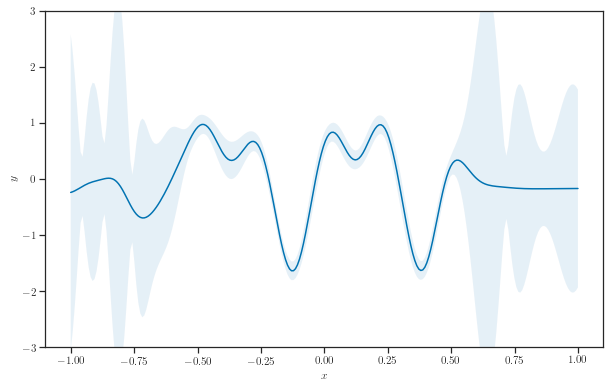

In [42]:
fig, ax = plt.subplots()

# ax.plot(X_q, gprm_mean_value[-1])
# ax.fill_between(np.squeeze(X_q), 
#                 gprm_mean_value[-1] - 2*gprm_stddev_value[-1], 
#                 gprm_mean_value[-1] + 2*gprm_stddev_value[-1], alpha=0.1)

ax.plot(X_q, vgp.mean())
ax.fill_between(np.squeeze(X_q), 
                np.squeeze(vgp.distribution.mean() - 2*vgp.distribution.stddev()), 
                np.squeeze(vgp.distribution.mean() + 2*vgp.distribution.stddev()), alpha=0.1)

# ax.scatter(X, Y, marker='x', color='k', label="noisy observations")

# ax.vlines(history["inducing_index_points"][-1], ymin=y_min, 
#           ymax=history["variational_inducing_observations_loc"][-1],
#           color='k', linewidth=1.0, alpha=0.4)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_ylim(y_min, y_max)

plt.show()

In [48]:
[variational_inducing_observations_loc, 
 variational_inducing_observations_scale] = tfd.VariationalGaussianProcess.optimal_variational_posterior(
    kernel=kernel,
    inducing_index_points=inducing_index_points,
    observation_index_points=X,
    observations=Y,
    observation_noise_variance=observation_noise_variance
)

In [49]:
vgp = tfd.VariationalGaussianProcess(
    kernel=kernel,
    index_points=X_q,
    inducing_index_points=inducing_index_points,
    variational_inducing_observations_loc=variational_inducing_observations_loc,
    variational_inducing_observations_scale=variational_inducing_observations_scale,
    observation_noise_variance=observation_noise_variance,
    jitter=jitter
)

TypeError: Found incompatible dtypes, <class 'numpy.float64'> and <class 'numpy.float32'>.

In [24]:
dataset = tf.data.Dataset.from_tensor_slices((X, Y)) \
                         .shuffle(buffer_size=500) \
                         .batch(batch_size, drop_remainder=True)
iterator = tf.data.make_initializable_iterator(dataset)
X_batch, Y_batch = iterator.get_next()
X_batch, Y_batch

(<tf.Tensor 'IteratorGetNext:0' shape=(50, 1) dtype=float64>,
 <tf.Tensor 'IteratorGetNext:1' shape=(50,) dtype=float64>)

In [25]:
nelbo = vgp.variational_loss(
    observations=Y_batch,
    observation_index_points=X_batch,
    kl_weight=batch_size/n_train
)

In [26]:
optimizer = tf.train.AdamOptimizer()
optimize = optimizer.minimize(nelbo)

In [27]:
steps_per_epoch = n_train // batch_size
steps_per_epoch

10

In [28]:
n_epochs = 100

In [29]:
jitter = 1e-8

In [30]:
Kxx = kernel.matrix(X, X)
Kxx

<tf.Tensor 'ExponentiatedQuadratic_1/matrix/Exp:0' shape=(500, 500) dtype=float64>

In [31]:
Kzz = kernel.matrix(inducing_index_points, inducing_index_points)
Kzz

<tf.Tensor 'ExponentiatedQuadratic_2/matrix/Exp:0' shape=(20, 20) dtype=float64>

In [33]:
history = defaultdict(list)

with tf.Session() as sess:

    sess.run(tf.global_variables_initializer())

    for i in range(n_epochs):

        sess.run(iterator.initializer)
        
        for j in range(steps_per_epoch):

#             sess.run(optimize)
            (_, nelbo_value, 
             amplitude_value, 
             length_scale_value,
             observation_noise_variance_value,
             inducing_index_points_value,
             variational_inducing_observations_loc_value,
             variational_inducing_observations_scale_value) = sess.run([optimize, 
                                                                        nelbo, 
                                                                        amplitude, 
                                                                        length_scale, 
                                                                        observation_noise_variance,
                                                                        inducing_index_points,
                                                                        variational_inducing_observations_loc, 
                                                                        variational_inducing_observations_scale])

        history["nelbo"].append(nelbo_value)
        history["amplitude"].append(amplitude_value)
        history["length_scale"].append(length_scale_value)
        history["observation_noise_variance"].append(observation_noise_variance_value)
        history["inducing_index_points"].append(inducing_index_points_value)
        history["variational_inducing_observations_loc"].append(variational_inducing_observations_loc_value)
        history["variational_inducing_observations_scale"].append(variational_inducing_observations_scale_value)

In [34]:
inducing_index_points_history = np.stack(history["inducing_index_points"])
inducing_index_points_history.shape

(100, 20, 1)

In [35]:
segments_min_history = np.dstack(np.broadcast_arrays(inducing_index_points_history, y_min))
segments_max_history = np.dstack([inducing_index_points_history, 
                                  history["variational_inducing_observations_loc"]])

In [36]:
segments_history = np.stack([segments_max_history, segments_min_history], axis=-2)
segments_history.shape

(100, 20, 2, 2)

In [37]:
kernel_history = kernel_cls(amplitude=history.get("amplitude"), length_scale=history.get("length_scale"))

vgp_history = tfd.VariationalGaussianProcess(
    kernel=kernel_history,
    index_points=X_q,
    inducing_index_points=np.stack(history.get("inducing_index_points")),
    variational_inducing_observations_loc=np.stack(history.get("variational_inducing_observations_loc")),
    variational_inducing_observations_scale=np.stack(history.get("variational_inducing_observations_scale")),
    observation_noise_variance=history.get("observation_noise_variance")
)
vgp_mean = vgp_history.mean()
vgp_stddev = vgp_history.stddev()

In [38]:
with tf.Session() as sess:
    vgp_mean_value, vgp_stddev_value = sess.run([vgp_mean[::10], vgp_stddev[::10]])

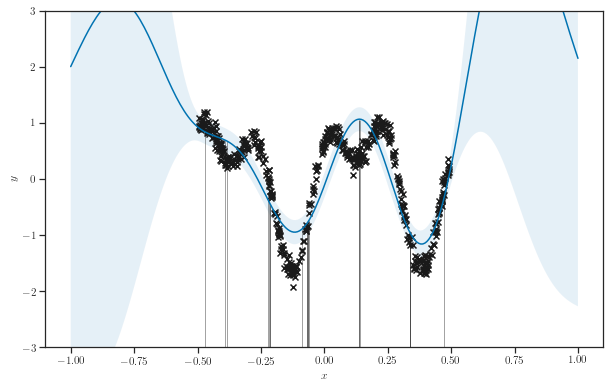

In [40]:
fig, ax = plt.subplots()

# ax.plot(X_q, gprm_mean_value[-1])
# ax.fill_between(np.squeeze(X_q), 
#                 gprm_mean_value[-1] - 2*gprm_stddev_value[-1], 
#                 gprm_mean_value[-1] + 2*gprm_stddev_value[-1], alpha=0.1)

ax.plot(X_q, vgp_mean_value[-1])
ax.fill_between(np.squeeze(X_q), 
                vgp_mean_value[-1] - 2*vgp_stddev_value[-1], 
                vgp_mean_value[-1] + 2*vgp_stddev_value[-1], alpha=0.1)

ax.scatter(X, Y, marker='x', color='k', label="noisy observations")

ax.vlines(history["inducing_index_points"][-1], ymin=y_min, 
          ymax=history["variational_inducing_observations_loc"][-1],
          color='k', linewidth=1.0, alpha=0.4)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_ylim(y_min, y_max)

plt.show()

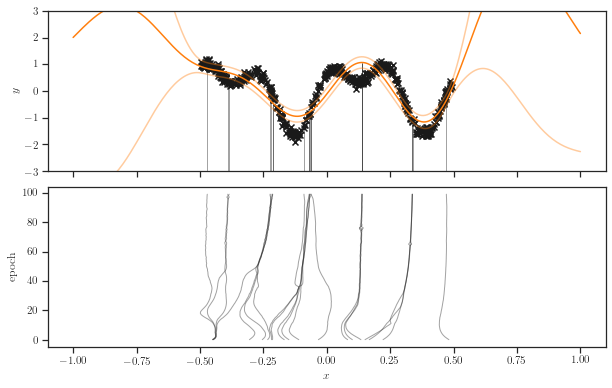

In [41]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, gridspec_kw=dict(hspace=0.1))

ax1.scatter(X, Y, marker='x', color='k')

# ax1.plot(X_q, gprm_mean_value[-1])
# ax1.fill_between(np.squeeze(X_q), 
#                  gprm_mean_value[-1] - 2*gprm_stddev_value[-1], 
#                  gprm_mean_value[-1] + 2*gprm_stddev_value[-1], alpha=0.1)

line_mean, = ax1.plot(X_q, vgp_mean_value[-1], color="tab:orange")
line_stddev_lower, = ax1.plot(X_q, vgp_mean_value[-1] - 2*vgp_stddev_value[-1], 
                              color="tab:orange", alpha=0.4)
line_stddev_upper, = ax1.plot(X_q, vgp_mean_value[-1] + 2*vgp_stddev_value[-1],
                              color="tab:orange", alpha=0.4)

vlines_inducing_index_points = ax1.vlines(inducing_index_points_history[-1].squeeze(), 
                                          ymax=history["variational_inducing_observations_loc"][-1],
                                          ymin=y_min, linewidth=1.0, alpha=0.4)

ax1.set_ylabel(r'$y$')
ax1.set_ylim(y_min, y_max)

lines_inducing_index_points = ax2.plot(inducing_index_points_history.squeeze(), range(n_epochs),
                                       color='k', linewidth=1.0, alpha=0.4)

ax2.set_xlabel(r"$x$")
ax2.set_ylabel("epoch")

plt.show()

In [42]:
def animate(i):

    line_mean.set_data(X_q, vgp_mean_value[i])
    line_stddev_lower.set_data(X_q, vgp_mean_value[i] - 2*vgp_stddev_value[i])
    line_stddev_upper.set_data(X_q, vgp_mean_value[i] + 2*vgp_stddev_value[i])

    vlines_inducing_index_points.set_segments(segments_history[i])

    for j, line in enumerate(lines_inducing_index_points):
        line.set_data(inducing_index_points_history[:i, j], range(i))

    ax2.relim()
    ax2.autoscale_view(scalex=False)

    return line_mean, line_stddev_lower, line_stddev_upper

In [43]:
anim = animation.FuncAnimation(fig, animate, frames=n_epochs,
                               interval=60, repeat_delay=5, blit=True)

In [ ]:
# HTML(anim.to_html5_video())